In [1]:
import numpy as np    
import pandas as pd
import gzip
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [7]:
def showImage(data):
    some_article = data   # Selecting the image.
    some_article_image = some_article.reshape(28, 28) # Reshaping it to get the 28x28 pixels
    plt.imshow(some_article_image, cmap = matplotlib.cm.binary, interpolation="nearest")
    plt.axis("off")
    plt.show()

In [8]:
filePath_train_set = '/cxldata/datasets/project/fashion-mnist/train-images-idx3-ubyte.gz'
filePath_train_label = '/cxldata/datasets/project/fashion-mnist/train-labels-idx1-ubyte.gz'

filePath_test_set = '/cxldata/datasets/project/fashion-mnist/t10k-images-idx3-ubyte.gz'
filePath_test_label = '/cxldata/datasets/project/fashion-mnist/t10k-labels-idx1-ubyte.gz'

with gzip.open(filePath_train_label, 'rb') as trainLbpath:
     trainLabel = np.frombuffer(trainLbpath.read(), dtype=np.uint8,
                               offset=8)
with gzip.open(filePath_train_set, 'rb') as trainSetpath:
     trainSet = np.frombuffer(trainSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(trainLabel), 784)

with gzip.open(filePath_test_label, 'rb') as testLbpath:
     testLabel = np.frombuffer(testLbpath.read(), dtype=np.uint8,
                               offset=8)

with gzip.open(filePath_test_set, 'rb') as testSetpath:
     testSet = np.frombuffer(testSetpath.read(), dtype=np.uint8,
                               offset=16).reshape(len(testLabel), 784)

print(type(testLabel))

print(trainSet.shape)

print(trainLabel.shape)

print(testSet.shape)

print(testLabel.shape)

X_train, X_test, y_train, y_test = trainSet, testSet, trainLabel, testLabel

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

<class 'numpy.ndarray'>
(60000, 784)
(60000,)
(10000, 784)
(10000,)
(60000, 784)
(60000,)
(10000, 784)
(10000,)


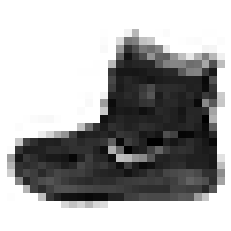

9

In [26]:
showImage(X_train[0])
y_train[0]

In [27]:
# Shuffling
np.random.seed(42)   # if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

# Feature Scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))

In [36]:
# Let us import some libraries that we will use quite often
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


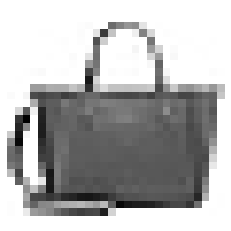

Logistic Accuracy:  0.87755
Logistic Precision:  0.8766648092442357
Logistic Recall:  0.87755
Logistic F1 Score:  0.8769448048542856


In [42]:
from sklearn.linear_model import LogisticRegression

# using Softmax Regression (multi-class classification problem)
log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
# 'C' is hyprparameter for regularizing L2
# 'lbfgs' is Byoden-Fletcher-Goldfarb-Shanno(BFGS) algorithm
log_clf.fit(X_train_scaled, y_train)

# Let us predict some instance from the dataset using the above trained model
y_train_predict = log_clf.predict(X_train[0].reshape(1, -1))

y_train[0]

#Let us see the predicted class

y_train_predict[0]

showImage(X_train[0])

# Let us predict all instances of training dataset X_train_scaled using the above trained model
y_train_predict = log_clf.predict(X_train_scaled)

log_accuracy = accuracy_score(y_train, y_train_predict)
log_precision = precision_score(y_train, y_train_predict, average='weighted')
log_recall = recall_score(y_train, y_train_predict, average='weighted')
log_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Logistic Accuracy: ", log_accuracy)
print("Logistic Precision: ", log_precision)
print("Logistic Recall: ", log_recall)
print("Logistic F1 Score: ", log_f1_score)


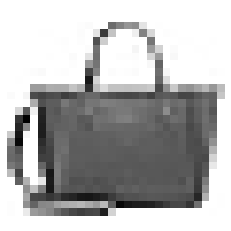

Random Forest Accuracy:  0.8766666666666667
Random Forest Precision:  0.8784075869648036
Random Forest Recall:  0.8766666666666667
Random Forest F1 Score:  0.875054729413325


In [51]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

# Scaling is not needed for Decision Tree algorithm and hence for Random Forest and XGBoost algorithms as they 
# are also based on Decision Trees. Hence, not using scaled training dataset here

rnd_clf.fit(X_train, y_train)

# Let us predict some instance from the data set using the above trained model
y_train_predict = rnd_clf.predict(X_train[0].reshape(1, -1))

y_train[0]

y_train_predict[0]

showImage(X_train[0])

# Let us predict all instances of training dataset X_train using the above trained model
y_train_predict = rnd_clf.predict(X_train)

rnd_accuracy = accuracy_score(y_train, y_train_predict)
rnd_precision = precision_score(y_train, y_train_predict, average='weighted')
rnd_recall = recall_score(y_train, y_train_predict, average='weighted')
rnd_f1_score = f1_score(y_train, y_train_predict, average='weighted')


print("Random Forest Accuracy: ", rnd_accuracy)
print("Random Forest Precision: ", rnd_precision)
print("Random Forest Recall: ", rnd_recall)
print("Random Forest F1 Score: ", rnd_f1_score)

In [60]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix

# function to calculate mean and standard deviation of each score (e.g. accuracy, precision, etc.)
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

log_clf = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42
) 

log_cv_scores = cross_val_score(log_clf, X_train_scaled, y_train, cv=3, scoring="accuracy") 
display_scores(log_cv_scores)
log_cv_accuracy = log_cv_scores.mean()

y_train_pred = cross_val_predict(log_clf, X_train_scaled, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
log_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
log_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
log_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Logistic CV Accuracy: ", log_cv_accuracy)
print("Logistic CV Precision: ", log_cv_precision)
print("Logistic CV Recall: ", log_cv_recall)
print("Logistic CV F1 Score: ", log_cv_f1_score)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695


/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

Logistic CV Accuracy:  0.8470833333333333
Logistic CV Precision:  0.8458694883855286
Logistic CV Recall:  0.8470833333333333
Logistic CV F1 Score:  0.846272242627941


In [78]:
rnd_clf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)

rnd_cv_scores = cross_val_score(rnd_clf, X_train, y_train, cv=3, scoring="accuracy") 
display_scores(rnd_cv_scores)
rnd_cv_accuracy = rnd_cv_scores.mean()

y_train_pred = cross_val_predict(rnd_clf, X_train, y_train, cv=3)
confusion_matrix(y_train, y_train_pred)
rnd_cv_precision = precision_score(y_train, y_train_pred, average='weighted')
rnd_cv_recall = recall_score(y_train, y_train_pred, average='weighted')
rnd_cv_f1_score = f1_score(y_train, y_train_pred, average='weighted')

print("Random Forest CV Accuracy: ", rnd_cv_accuracy)
print("Random Forest CV Precision: ", rnd_cv_precision)
print("Random Forest CV Recall: ", rnd_cv_recall)
print("Random Forest CV F1 Score: ", rnd_cv_f1_score)

Scores: [0.85155 0.84745 0.84585]
Mean: 0.8482833333333334
Standard deviation: 0.002400462918318523
Random Forest CV Accuracy:  0.8482833333333334
Random Forest CV Precision:  0.8482875291253137
Random Forest CV Recall:  0.8482833333333333
Random Forest CV F1 Score:  0.8452574403288833


In [92]:
print("=== Softmax === ")
display_scores(log_cv_scores)
print("log_cv_accuracy:", log_cv_accuracy)
print("log_cv_precision:", log_cv_precision)
print("log_cv_recall:", log_cv_recall)
print("log_cv_f1_score:", log_cv_f1_score)

print("=== Random Forest === ")
display_scores(rnd_cv_scores)
print("rnd_cv_accuracy:", rnd_cv_accuracy)
print("rnd_cv_precision:", rnd_cv_precision)
print("rnd_cv_recall :", rnd_cv_recall )
print("rnd_cv_f1_score:", rnd_cv_f1_score)

=== Softmax === 
Scores: [0.84905 0.84825 0.84395]
Mean: 0.8470833333333333
Standard deviation: 0.0022395436042987695
log_cv_accuracy: 0.8470833333333333
log_cv_precision: 0.8458694883855286
log_cv_recall: 0.8470833333333333
log_cv_f1_score: 0.846272242627941
=== Random Forest === 
Scores: [0.85155 0.84745 0.84585]
Mean: 0.8482833333333334
Standard deviation: 0.002400462918318523
rnd_cv_accuracy: 0.8482833333333334
rnd_cv_precision: 0.8482875291253137
rnd_cv_recall : 0.8482833333333333
rnd_cv_f1_score: 0.8452574403288833


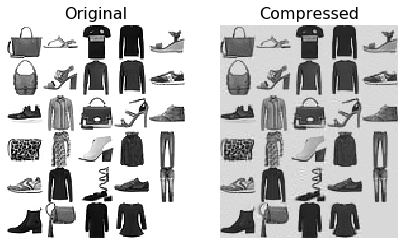

In [93]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.99)
X_train_reduced = pca.fit_transform(X_train)
pca.n_components_

# Checking if hit your 99% minimum?
np.sum(pca.explained_variance_ratio_)

# use inverse_transform to decompress back to 784 dimensions

X_train_recovered = pca.inverse_transform(X_train_reduced)

import matplotlib
import matplotlib.pyplot as plt

def plot_digits(instances, images_per_row=5, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

plt.figure(figsize=(7, 4))
plt.subplot(121)
# Plotting 'original' image
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
# Plotting the corresponding 'recovered' image
plot_digits(X_train_recovered[::2100])
plt.title("Compressed", fontsize=16)
plt.show()

In [102]:
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import  LogisticRegression
from sklearn.model_selection import GridSearchCV


log_clf_ens = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10 , random_state=42)
rnd_clf_ens = RandomForestClassifier(n_estimators=20, max_depth=10 , random_state=42)


voting_clf_grid_search = VotingClassifier(
    estimators=[('lr', log_clf_ens), ('rf', rnd_clf_ens)],
    voting='soft')

param_grid = [
    {
        "lr__multi_class":["multinomial"],
        "lr__solver":["lbfgs"],
        "lr__C":[5],
        "rf__n_estimators":[20],
        "rf__max_depth":[10, 15],
    }]

grid_search = GridSearchCV(voting_clf_grid_search, param_grid, cv=3, scoring="neg_mean_squared_error")


grid_search.fit(X_train_reduced, y_train)
grid_search.best_params_
grid_search.best_estimator_

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/anaconda/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#lo

1.380380382358428 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 10, 'rf__n_estimators': 20}
1.3714651532819442 {'lr__C': 5, 'lr__multi_class': 'multinomial', 'lr__solver': 'lbfgs', 'rf__max_depth': 15, 'rf__n_estimators': 20}


Final Accuracy:  0.8477
Final Precision:  0.8455248386644493
Final Recall:  0.8477
Final F1 Score:  0.8460425762332676


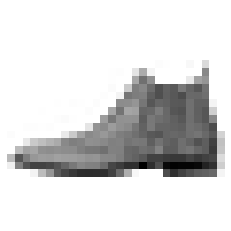

In [112]:
# Evaluate model on the test Set

final_model = grid_search.best_estimator_

from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# Remember, you have to use pca object of training dataset (you got on training dataset during dimensionality reduction)
# and only apply transform on test dataset (not fit_transform) - highly important

X_test_reduced = pca.transform(X_test)

y_test_predict = final_model.predict(X_test_reduced)

confusion_matrix(y_test, y_test_predict)
final_accuracy = accuracy_score(y_test, y_test_predict)
final_precision = precision_score(y_test, y_test_predict, average='weighted')
final_recall = recall_score(y_test, y_test_predict, average='weighted')
final_f1_score = f1_score(y_test, y_test_predict, average='weighted')


print("Final Accuracy: ", final_accuracy)
print("Final Precision: ", final_precision)
print("Final Recall: ", final_recall)
print("Final F1 Score: ", final_f1_score)

# Just check with a sample value, if the predictions were correct

y_test[0]

y_test_predict[0]

showImage(X_test[0])